In [10]:
import pandas as pd
import matplotlib.pyplot as plt

In [7]:
draft = pd.read_table("draft.txt", sep = '\t')

In [8]:
draft.index = draft.index + 1
draft = draft.reset_index()

Text(0, 0.5, 'Result')

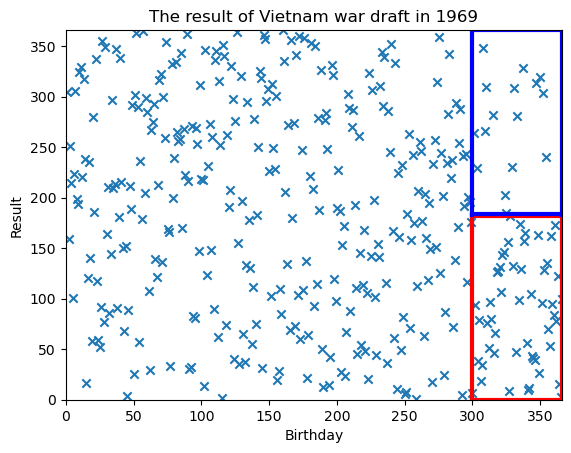

In [34]:
plt.scatter(data = draft, x = "index", y = "N69", marker = 'x')
plt.axhline(y = 182, xmin = 300/366, xmax = 1, color = 'red', lw  = 3)
plt.axhline(y = 184, xmin = 300/366, xmax = 1, color = 'blue', lw = 3)
plt.axhline(y = 0, xmin = 300/366, xmax = 1, color = 'red', lw  = 3)
plt.axhline(y = 366, xmin = 300/366, xmax = 1, color = 'blue', lw = 3)

plt.axvline(x = 300, ymin = 0, ymax= 0.5, color = 'red', lw  = 3)
plt.axvline(x = 366, ymin = 0, ymax= 0.5, color = 'red',lw  = 3)
plt.axvline(x = 300, ymin = 0.5, ymax= 1, color = 'blue',lw  = 3)
plt.axvline(x = 366, ymin = 0.5, ymax= 1, color = 'blue',lw  = 3)

plt.title("The result of Vietnam war draft in 1969")
plt.xlim(0,366)
plt.ylim(0,366)
plt.xlabel("Birthday")
plt.ylabel("Result")

In [1]:
import re
import pandas as pd
import matplotlib.pyplot as plt

# Regular expression to capture the data
pattern = re.compile(r"group : (\d+), d : (\d+), weight = ([\d.]+), result = (\d+)")

# Function to read a file and extract data using the regex
def extract_data_from_file(file_path):
    extracted_data = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                type_val = int(match.group(1))
                d_val = int(match.group(2))
                weight_val = float(match.group(3))
                result_val = int(match.group(4))
                
                extracted_data.append({
                    'group': type_val,
                    'd': d_val,
                    'weight': weight_val,
                    'result': result_val
                })
    
    return pd.DataFrame(extracted_data)

In [44]:
diff_F_data = extract_data_from_file('result_diffF.txt')

In [51]:
temp = (diff_F_data.d.value_counts() == 3).reset_index()
common_d = list(temp[temp['count'] == True].d)

In [65]:
diff_F_data

,group,d,weight,result
0,1,490,0.1,11
1,1,390,0.1,9
2,1,340,0.1,8
3,1,300,0.1,8
4,1,310,0.1,13
...,...,...,...,...
977,1,146,0.1,8
978,1,376,0.1,9
979,1,46,0.1,13
980,1,36,0.1,9


In [72]:
diff_F_data_filtered = diff_F_data.loc[diff_F_data['d'].isin(common_d)]

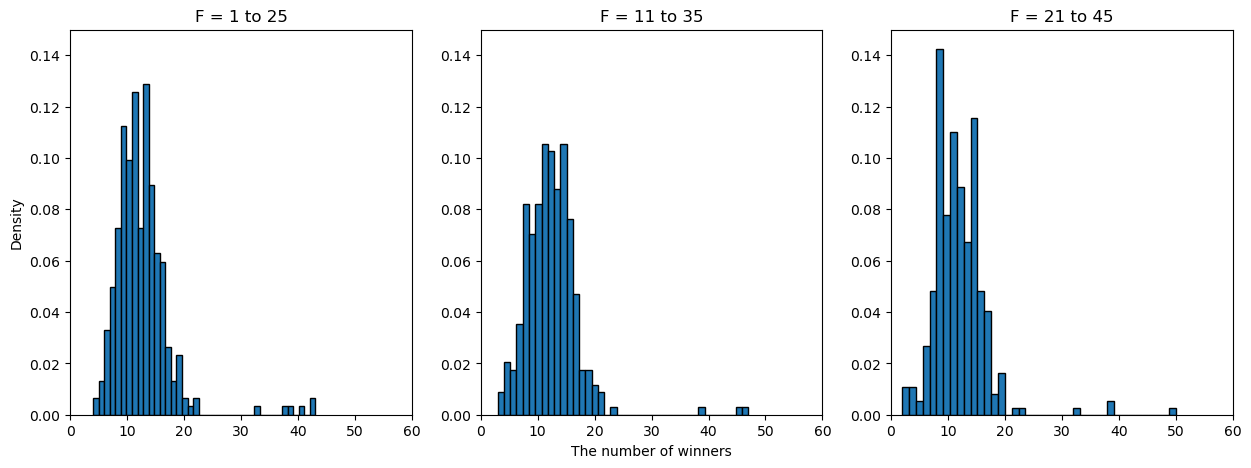

In [73]:
grouplabel = ['F = 1 to 25', 'F = 11 to 35', 'F = 21 to 45']
fig, ax = plt.subplots(1,3, figsize = (15,5))
for i in range(3):
    ax[i].hist(diff_F_data_filtered[diff_F_data_filtered.group==(i+1)].result, density = True, edgecolor = 'black', bins = 40)
    ax[i].set_xlim(0,60)
    ax[i].set_ylim(0, 0.15)
    ax[1].set_xlabel('The number of winners')
    ax[0].set_ylabel('Density')
    ax[i].set_title(f'{grouplabel[i]}')

In [10]:
diff_F_data.groupby('group').result.count()

group
1    354
2    318
3    310
Name: result, dtype: int64

In [69]:
pattern = re.compile(r"d : (\d+), weight = ([\d.]+), result = (\d+)")

def extract_data_from_file2(file_path):
    extracted_data = []
    
    with open(file_path, 'r', encoding='utf-8') as file:
        for line in file:
            match = pattern.search(line)
            if match:
                d_val = int(match.group(1))
                weight_val = float(match.group(2))
                result_val = int(match.group(3))
                
                extracted_data.append({
                    'd': d_val,
                    'weight': weight_val,
                    'result': result_val
                })
    
    return pd.DataFrame(extracted_data)

In [71]:
nonrandom_data = extract_data_from_file2('result_nonrandom_draw.txt')

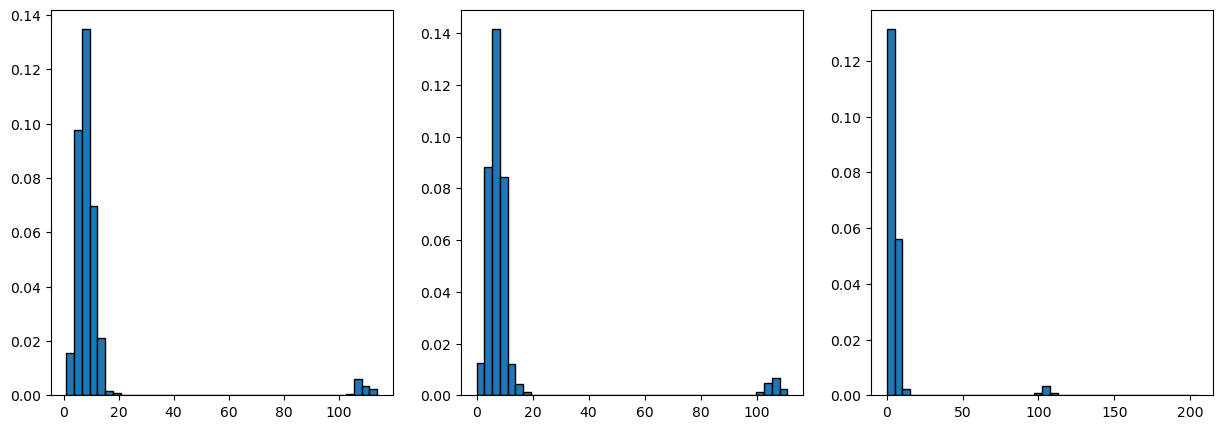

In [76]:
weight = [0.1, 0.2, 0.5]

fig, ax = plt.subplots(1,3, figsize = (15,5))
for i, w in enumerate(weight):
    ax[i].hist(nonrandom_data[nonrandom_data.weight==w].result, density = True, edgecolor = 'black', bins = 40)

weight
0.1    11.449333
0.2    11.318667
0.5     7.332000
Name: result, dtype: float64